In [3]:
import pandas as pd
import os
import sys
import seaborn as sns


import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utilities.constants import PRETTY_NAMES

In [4]:
import json
utility = 'COMET'

models = [
    'basic_model',
    'last_hidden_state_model',
    'token_statistics_model',
    'full_dec_model',
    'full_dec_no_stat_model',
    'comet_model',
    'full_dec_comet_model'
]


ms = [
    1,2,3,4,5,10,25,50, 100
]



def load_results_models(models, utility='unigram-f1'):
    base = '../results/{}/'.format(utility)
    results = {}
    for model in models:
        summary_ref = base + model + '/summary.json'
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[model] = summary
    return results




def load_result_m_mc_estimate(utility='unigram-f1'):
    base = '../results/{}/'.format(utility)
    results = {}
    for m in ms:
        summary_ref = base + 'basic_reference_model_{}/summary.json'.format(m)
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[m] = summary
    return results


def load_result_basic_ref_model_estimate(utility='unigram-f1'):
    base = '../results/{}/'.format(utility)
    results = {}
    for m in ms:
        summary_ref = base + '{}_mc_estimate/summary.json'.format(m)
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[m] = summary
    return results

def load_result_unigram_model_estimate(utility='unigram-f1'):
    base = '../results/{}/'.format(utility)
    results = {}
    for m in [1,2,3,4,5]:
        summary_ref = base + 'unigram_count_model_{}/summary.json'.format(m)
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[m] = summary
    return results


In [15]:
from cycler import cycler
import itertools
def graph_results(models, utility, statistic, title,  statistic_name='', y_log=False, save_ref=None):
    # Get the result of the models
    results_model = load_results_models(models, utility=utility)
    
    statistics_models = [r[statistic] for _, r in results_model.items()]
    
    # Get the result of the m-MC estimate
    
    results_m_mc_estimate = load_result_m_mc_estimate(utility=utility)
    statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    # Get the results for the basic ref model
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility)
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
     # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=utility)
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    # Graph the results
    names = [PRETTY_NAMES[name] for name in models]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    
    color_palette = itertools.cycle(sns.color_palette('Set2'))
    plt.rcParams.update({'font.size': 12})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']
    
    lw=2.5
    for line, name, stat in zip(lines, names, statistics_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, line,label=name, lw=lw, color = color)


    ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=2)
        
    if y_log:
        ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('m')
    ax.set_ylabel(statistic_name)
    ax.set_title(title)
    lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
#           ncol=3, fancybox=True, shadow=True)
    if save_ref:
        plt.savefig(save_ref,  bbox_extra_artists=(lgd,), bbox_inches='tight')
        

    

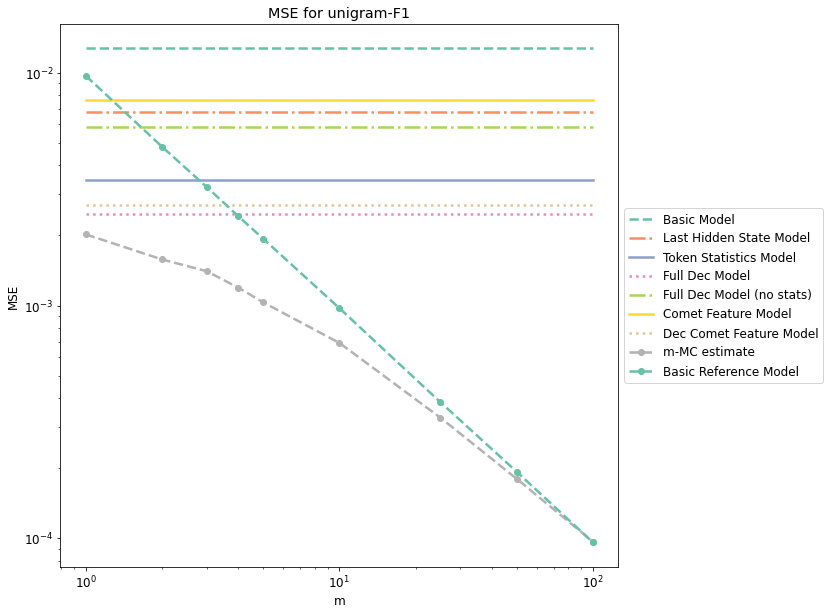

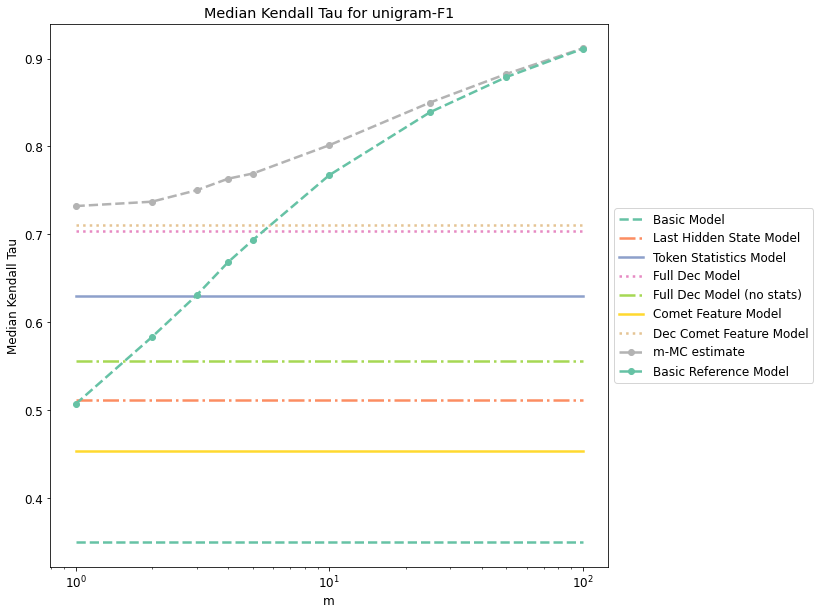

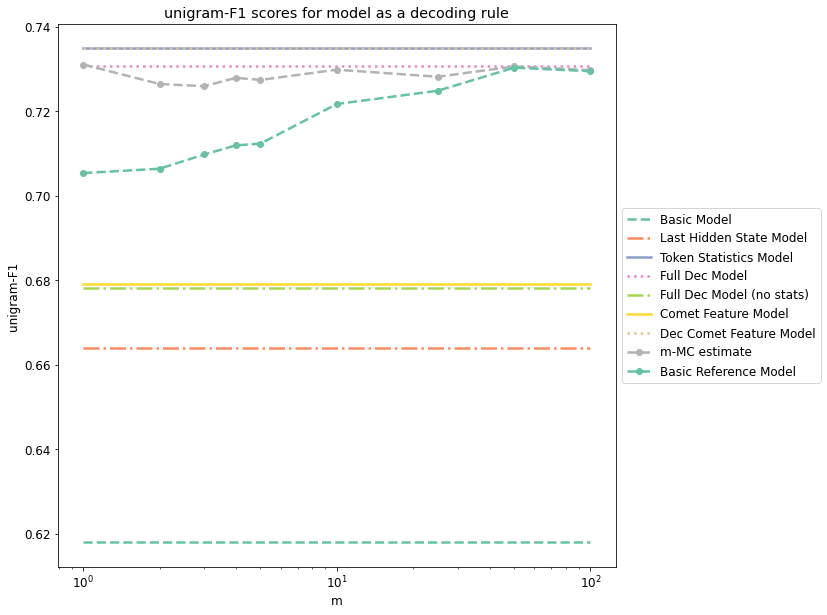

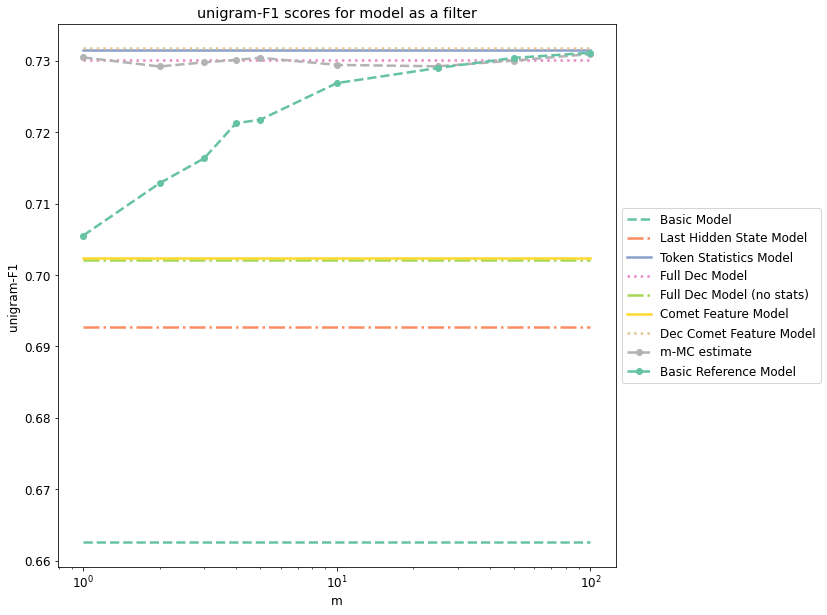

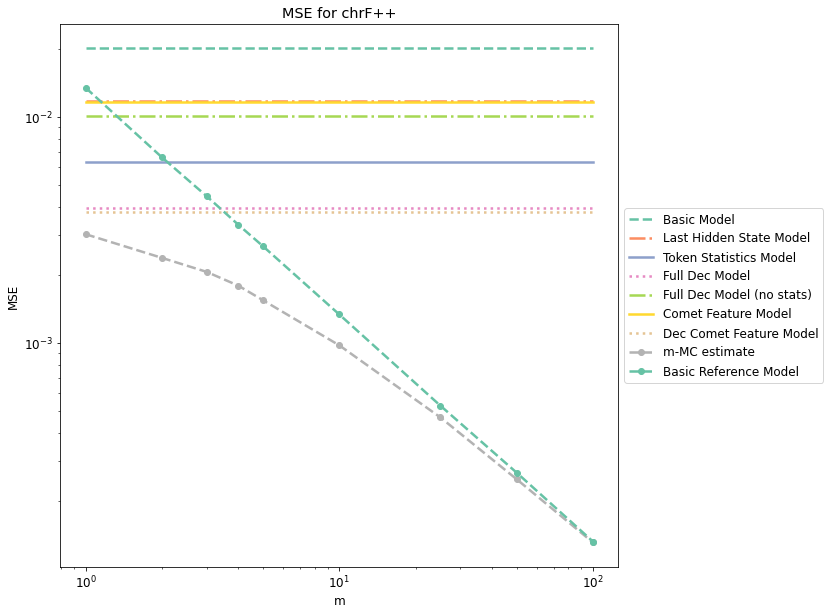

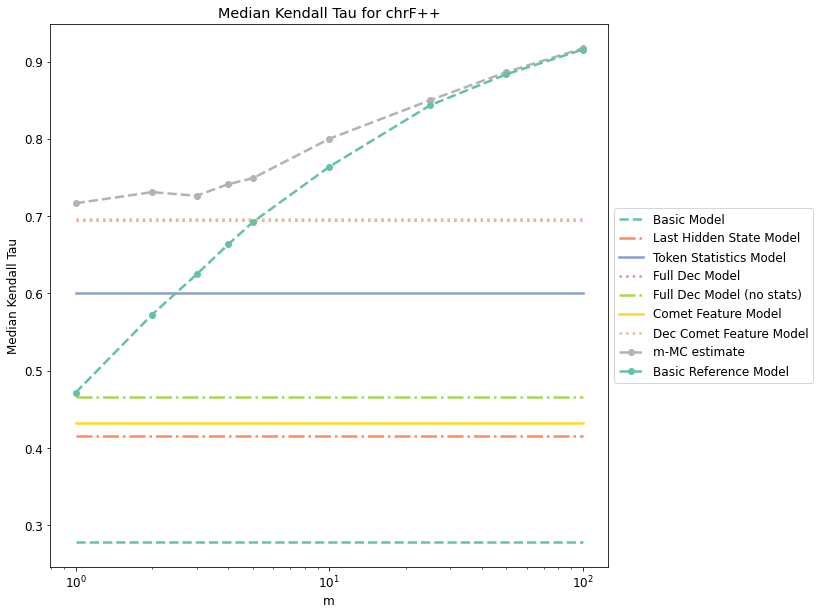

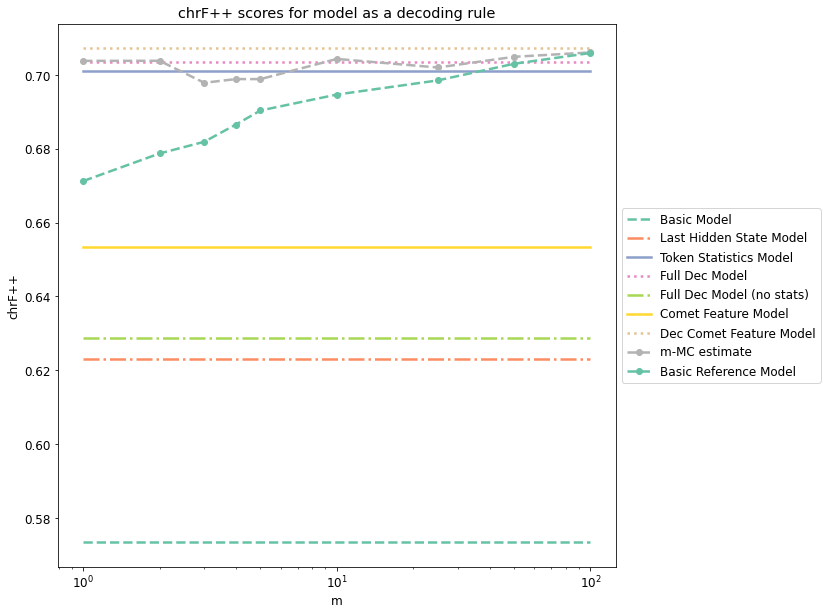

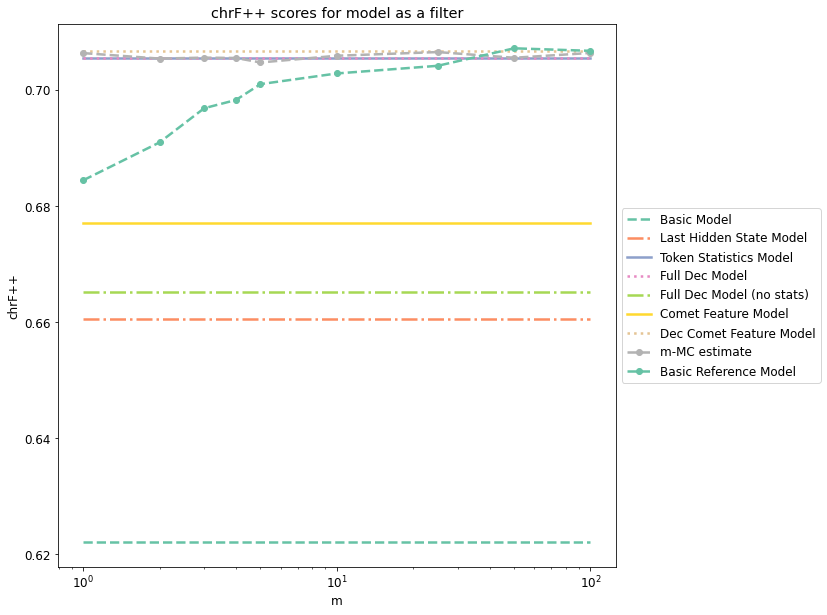

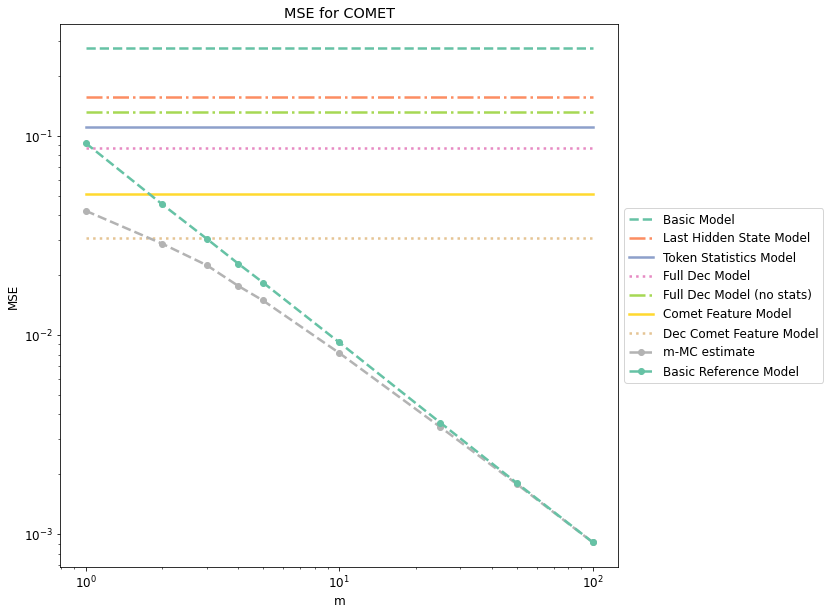

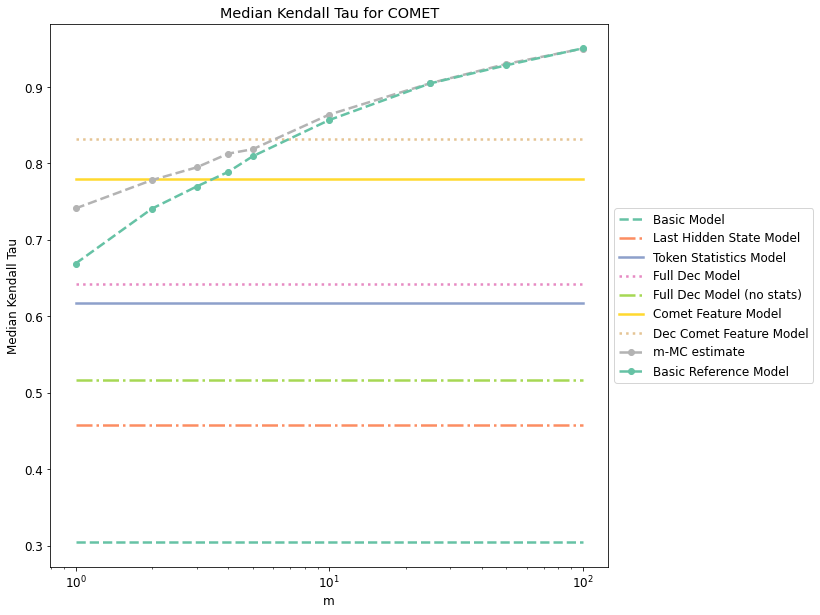

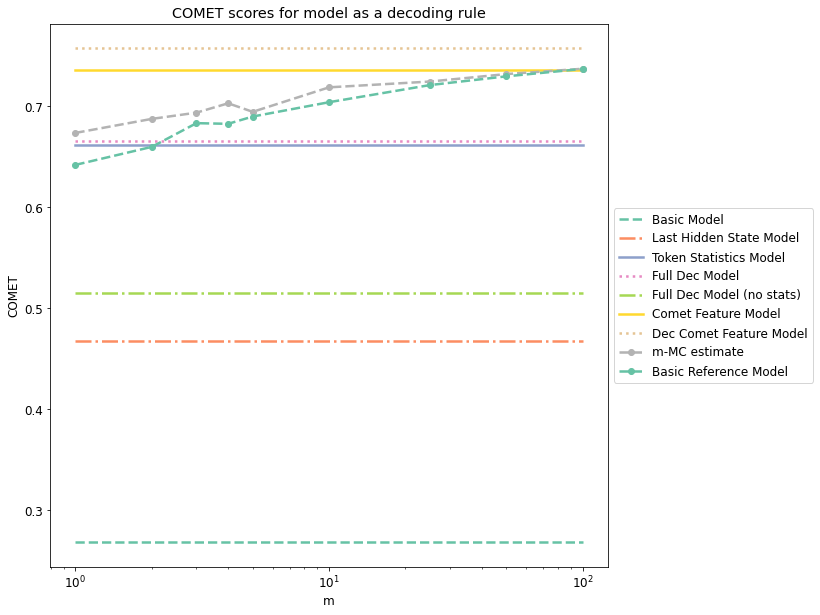

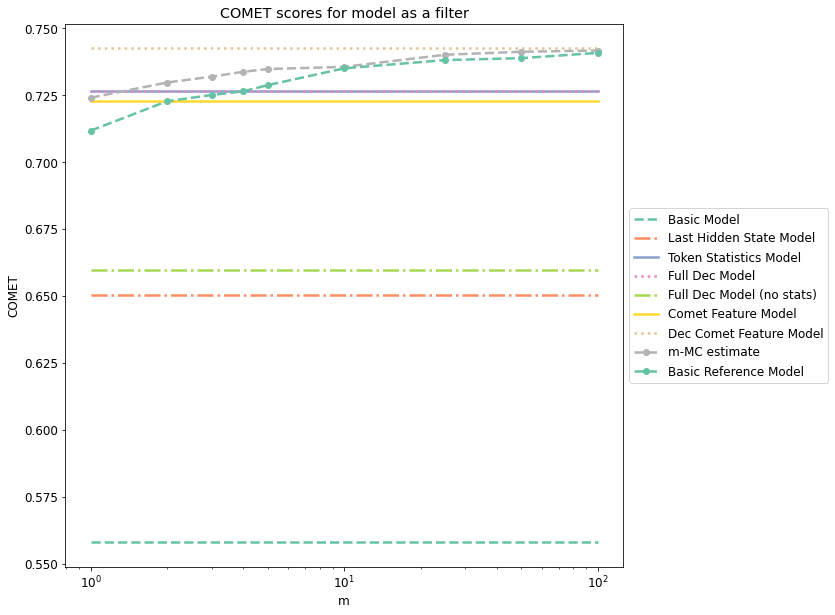

In [16]:
sns.color_palette('deep')

utilities = [
    ('unigram-f1', 'unigram-F1'),
    ('chrf', 'chrF++'),
    ('comet', 'COMET'),
]

statistics = [
    ('MSE', 'MSE', True),
    ('median_kendall_taus', 'Median Kendall Tau', False),

]

for util in utilities:
    for statistic in statistics:
        title = '{} for {}'.format(statistic[1], util[1])
        
        save_ref = '../results/{}/{}_{}.png'.format(util[0], util[0], statistic[0] )
        graph_results(models, util[0], statistic[0], title=title, statistic_name=statistic[1], y_log=statistic[2], save_ref=save_ref)
        
    save_ref = '../results/{}/{}_decoding.png'.format(util[0], util[0],  )
    title = '{} scores for model as a {}'.format(util[1], 'decoding rule')
    graph_results(models, util[0], 'best_{}_mean'.format(util[0].replace('-', '_')),  title=title, statistic_name=util[1],save_ref=save_ref)
    
    save_ref = '../results/{}/{}_filter.png'.format(util[0], util[0],  )
    title = '{} scores for model as a {}'.format(util[1], 'filter')
    graph_results(models, util[0], 'top_10_{}_mean'.format(util[0].replace('-', '_')),title=title, statistic_name=util[1],save_ref=save_ref)

#     save_ref = '../results/{}/{}_decoding_median.jpg'.format(util[0], util[0],  )
#     title = '{} scores for model as a {}'.format(util[1], 'decoding rule')
#     graph_results(models, util[0], 'best_{}_median'.format(util[0].replace('-', '_')),  title=title, statistic_name=util[1],save_ref=save_ref)
   

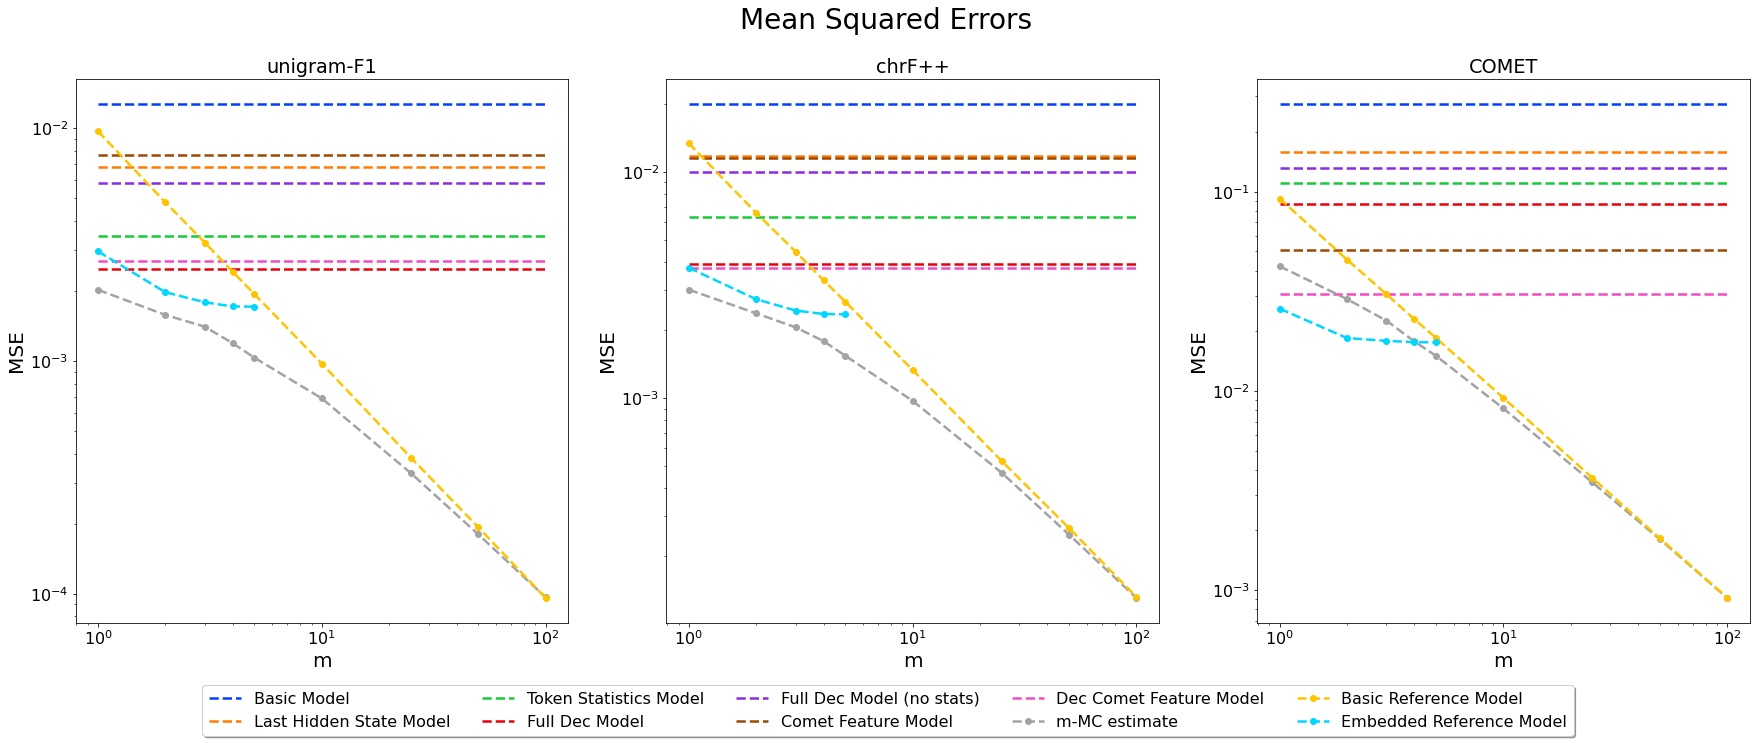

In [77]:
### Create a figure for MSE scores

# First we load a 


statistic = 'MSE'

fig, (axs) = plt.subplots(1, 3, figsize=(30,10))

for i, utility in enumerate(utilities):
    ax = axs[i]
    
    names = [PRETTY_NAMES[name] for name in models]
    
    ### HERE we gather the statistics
    result_models = load_results_models(models, utility=utility[0])
    statistic_models = [r[statistic] for _, r in result_models.items()]
    
    
    results_m_mc_estimate = load_result_m_mc_estimate(utility=utility[0])
    statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
    # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=utility[0])
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    #### HERE we show the results
    color_palette = itertools.cycle(sns.color_palette('bright'))
    plt.rcParams.update({'font.size': 16})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

    lw=2.5
    for line, name, stat in zip(lines, names, statistic_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.tick_params(axis='both', which='major', labelsize=16)
    #ax.tick_params(axis='both', which='minor', labelsize=16)
    ax.set_xlabel('m',  size=20)
    ax.set_ylabel('MSE' ,  size=20)
    ax.set_title(utility[1])
    
    ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -.1), fancybox=True, shadow=True, ncol=5)
fig.suptitle('Mean Squared Errors', fontsize=28)
plt.show()


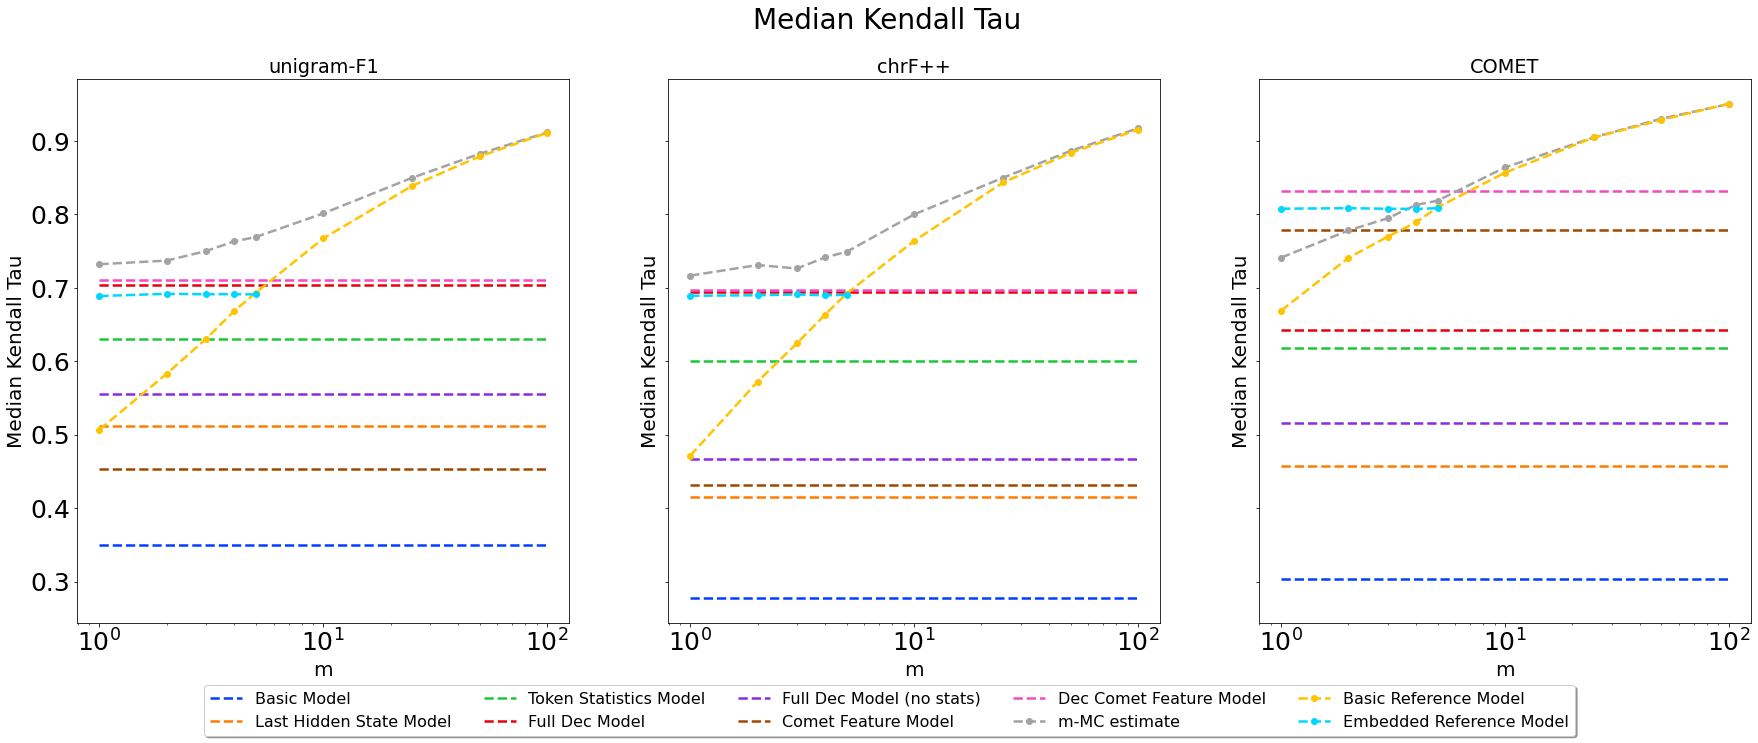

In [83]:
### Create a figure for MSE scores

# First we load a 


statistic = 'median_kendall_taus'

fig, (axs) = plt.subplots(1, 3, figsize=(30,10), sharey=True)

for i, utility in enumerate(utilities):
    ax = axs[i]
    
    names = [PRETTY_NAMES[name] for name in models]
    
    ### HERE we gather the statistics
    result_models = load_results_models(models, utility=utility[0])
    statistic_models = [r[statistic] for _, r in result_models.items()]
    
    
    results_m_mc_estimate = load_result_m_mc_estimate(utility=utility[0])
    statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
    # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=utility[0])
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    #### HERE we show the results
    color_palette = itertools.cycle(sns.color_palette('bright'))
    plt.rcParams.update({'font.size': 16})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

    lw=2.5
    for line, name, stat in zip(lines, names, statistic_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
    ax.set_xscale('log')

#     ax.tick_params(axis='both', which='major', labelsize=25)
#     ax.tick_params(axis='both', which='minor', labelsize=25)
    ax.set_xlabel('m',  size=20)
    ax.set_ylabel('Median Kendall Tau' ,  size=20)
    ax.set_title(utility[1])
    
    ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -.1), fancybox=True, shadow=True, ncol=5)
fig.suptitle('Median Kendall Tau', fontsize=28)
plt.show()


In [ ]:
### Create a figure for MSE scores

# First we load a 




fig, (axs) = plt.subplots(1, 3, figsize=(30,10), sharey=True)

for i, utility in enumerate(utilities):
    ax = axs[i]
    
    names = [PRETTY_NAMES[name] for name in models]
    
    statistic = 'best_{}_score'.format('')
    
    ### HERE we gather the statistics
    result_models = load_results_models(models, utility=utility[0])
    statistic_models = [r[statistic] for _, r in result_models.items()]
    
    
    results_m_mc_estimate = load_result_m_mc_estimate(utility=utility[0])
    statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
    # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=utility[0])
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    #### HERE we show the results
    color_palette = itertools.cycle(sns.color_palette('bright'))
    plt.rcParams.update({'font.size': 16})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

    lw=2.5
    for line, name, stat in zip(lines, names, statistic_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
    ax.set_xscale('log')

#     ax.tick_params(axis='both', which='major', labelsize=25)
#     ax.tick_params(axis='both', which='minor', labelsize=25)
    ax.set_xlabel('m',  size=20)
    ax.set_ylabel('Median Kendall Tau' ,  size=20)
    ax.set_title(utility[1])
    
    ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -.1), fancybox=True, shadow=True, ncol=5)
fig.suptitle('Median Kendall Tau', fontsize=28)
plt.show()